In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [13]:
df=pd.read_csv("Social_Network_Ads.csv")

In [14]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [16]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
df=df.drop("User ID",axis=1)

In [8]:
df=df.drop_duplicates

In [17]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [18]:
df.Gender=df.Gender.map({"Male":1,"Female":0})

**Splitting the dataset into the Training set and Test set**

In [20]:
from sklearn.model_selection import train_test_split
x=df[['Gender','Age','EstimatedSalary']].values
y=df['Purchased'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Feature Scaling**

In [21]:
from sklearn.preprocessing import StandardScaler
scaller=StandardScaler()
scaller.fit(x_train)
x_train=scaller.transform(x_train)
x_test=scaller.transform(x_test)

In [29]:
x_test

array([[ 1.05131497e+00,  9.08346649e-02,  1.59016942e+00],
       [ 1.05131497e+00, -9.20994514e-01,  1.61998276e+00],
       [-9.51189731e-01,  6.42741489e-01, -1.39116532e+00],
       [ 1.05131497e+00, -7.37025572e-01, -1.59985875e+00],
       [ 1.05131497e+00,  1.82819136e-01,  1.88942089e-01],
       [ 1.05131497e+00, -2.77103218e-01,  1.88942089e-01],
       [-9.51189731e-01, -1.14980588e-03,  1.29203594e+00],
       [ 1.05131497e+00, -7.37025572e-01,  3.38008826e-01],
       [ 1.05131497e+00, -2.77103218e-01, -8.84338417e-01],
       [-9.51189731e-01, -2.77103218e-01, -6.45831638e-01],
       [-9.51189731e-01, -9.20994514e-01, -9.43965112e-01],
       [ 1.05131497e+00, -1.14980588e-03,  6.96886995e-02],
       [ 1.05131497e+00, -1.28893240e+00, -1.36135197e+00],
       [-9.51189731e-01, -1.47290134e+00, -1.68818080e-01],
       [ 1.05131497e+00, -1.01297898e+00,  5.76515605e-01],
       [ 1.05131497e+00, -2.77103218e-01,  5.76515605e-01],
       [ 1.05131497e+00, -1.28893240e+00

**Fitting Decision Tree Classification to the Training set**

In [59]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

**Predicting the Test set results**

In [60]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

**Making the Confusion Matrix**

In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[50  5]
 [ 1 24]]


**Visualising the Training set results**

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.413\ngini = 0.466\nsamples = 320\nvalue = [202, 118]'),
 Text(0.25, 0.5, 'X[2] <= 0.651\ngini = 0.256\nsamples = 219\nvalue = [186, 33]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.081\nsamples = 190\nvalue = [182, 8]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.238\nsamples = 29\nvalue = [4, 25]'),
 Text(0.75, 0.5, 'X[1] <= 0.781\ngini = 0.267\nsamples = 101\nvalue = [16, 85]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.202\nsamples = 79\nvalue = [9, 70]')]

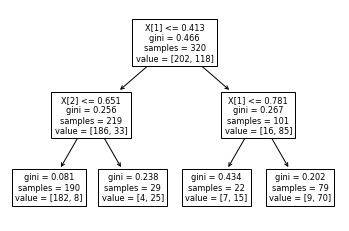

In [62]:
from sklearn import tree
tree.plot_tree(model) 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


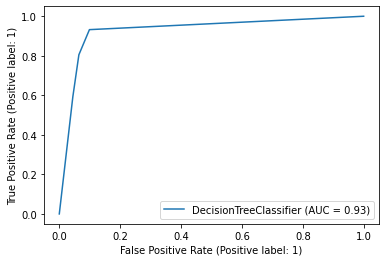

In [63]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,x_train,y_train)

**Visualising the Test set results**

Test set accuracy: 0.93
Test set auc: 0.93


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


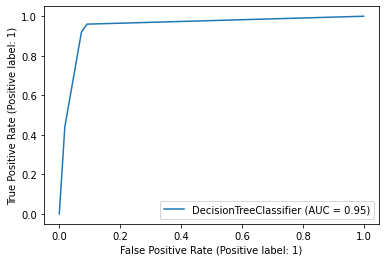

In [64]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = model.predict(x_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(model, x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


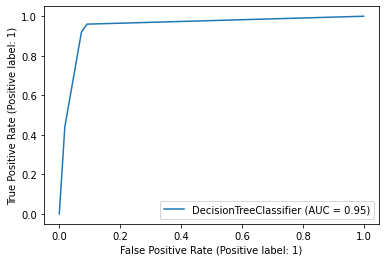

In [65]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,x_test,y_test)